In [132]:
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from skimage import filters
%matplotlib widget

### Buscar la carpeta de la muestra
Buscar la carpeta que se quiera estudiar. En esta estan las carpetas 'Point#' ,'Dark' y 'Positions'.
En algunos casos falta la carpeta 'Positions' entonces no se podra ejecutar la primera parte del notebook.

In [253]:
Path="C:/Users/mikel/LaserLab Dropbox/Proyectos/data/CMOS2/ITO/BOLD_131_B1/BOLD_131_B1_FREE_P16_20220916/"
npoints=16
os.listdir(Path)


['Dark',
 'Filter1',
 'FocusOut',
 'Point1',
 'Point10',
 'Point11',
 'Point12',
 'Point13',
 'Point14',
 'Point15',
 'Point16',
 'Point2',
 'Point3',
 'Point4',
 'Point5',
 'Point6',
 'Point7',
 'Point8',
 'Point9',
 'Positions']

### Positions

Para ver que todos los puntos que se estudian estan en un mismo plano

In [254]:
Positions=Path+'Positions/'+os.listdir(Path+'Positions/')[0]
PosArray=np.loadtxt(Positions,delimiter=',')
print(PosArray)

[[12.13604063 15.         12.         10.        ]
 [12.10503675 16.33333333 12.         10.        ]
 [12.07403288 17.66666667 12.         10.        ]
 [12.02902725 19.         12.         10.        ]
 [12.1990485  15.         13.33333333 10.        ]
 [12.16804463 16.33333333 13.33333333 10.        ]
 [12.13704075 17.66666667 13.33333333 10.        ]
 [12.09203513 19.         13.33333333 10.        ]
 [12.26105625 15.         14.66666667 10.        ]
 [12.23005238 16.33333333 14.66666667 10.        ]
 [12.1990485  17.66666667 14.66666667 10.        ]
 [12.15404288 19.         14.66666667 10.        ]
 [12.32406413 15.         16.         10.        ]
 [12.29206013 16.33333333 16.         10.        ]
 [12.26205638 17.66666667 16.         10.        ]
 [12.21605063 19.         16.         10.        ]]


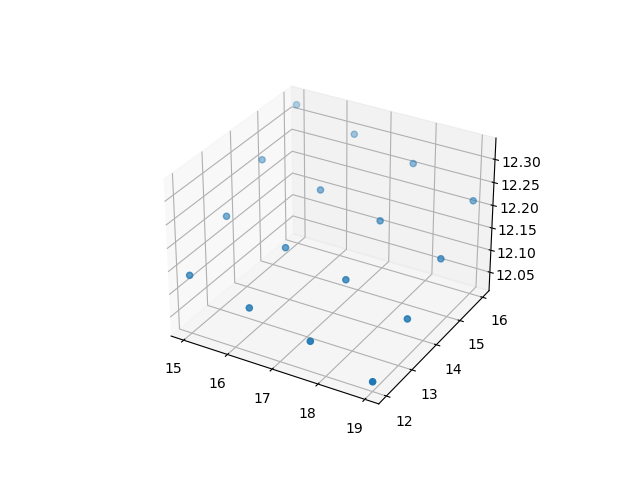

In [255]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(PosArray[:,1],PosArray[:,2],PosArray[:,0])

### Dark

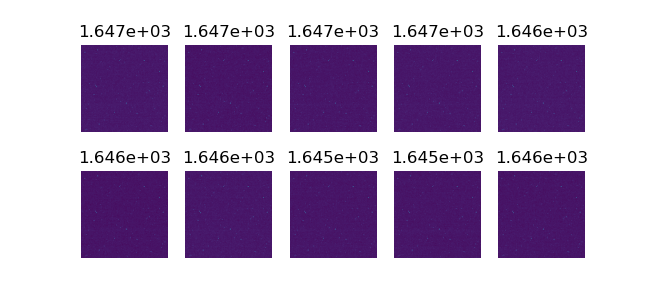

In [256]:
i=0
fig,axs=plt.subplots(2,5,figsize=(6.5,3))
for filt in range(2,12):
    image=Path+'Dark/Filter_{}_ExpoT_10s_dark.csv'.format(filt)
    imagearray=np.loadtxt(image)[140:310,170:340]
    axs[np.floor_divide(i,5),np.mod(i,5)].set_title('{:.3e}'.format(np.mean(imagearray)))
    axs[np.floor_divide(i,5),np.mod(i,5)].imshow(imagearray)
    axs[np.floor_divide(i,5),np.mod(i,5)].axis('off')
    i+=1

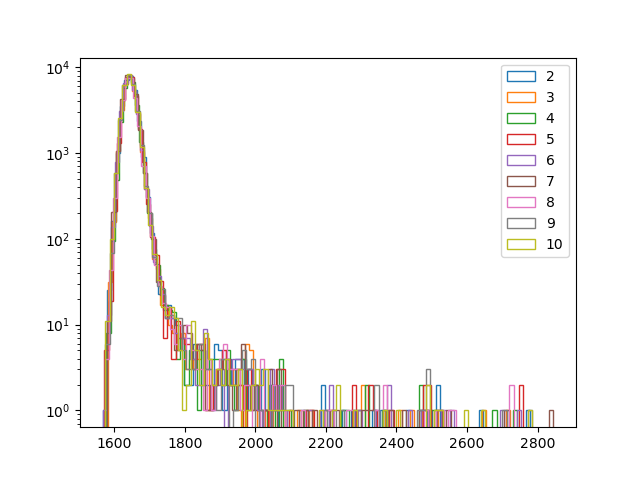

In [257]:
plt.figure()
for filt in range(2,11):
    image=Path+'Dark/Filter_{}_ExpoT_10s_dark.csv'.format(filt)
    imagearray=np.loadtxt(image)[140:310,170:340]
    plt.hist(imagearray.flatten(),bins=100,label=filt,histtype=u'step')
#plt.xscale('log')
plt.yscale('log')
plt.legend()

Hay algunos pixels que se saltan siempre. Para quitar estos he sumado todas las imagenes dark y he quitado los pixeles que mas intensidad dan. He escogido quitar los que se desvian mas de 5 sigmas de la media

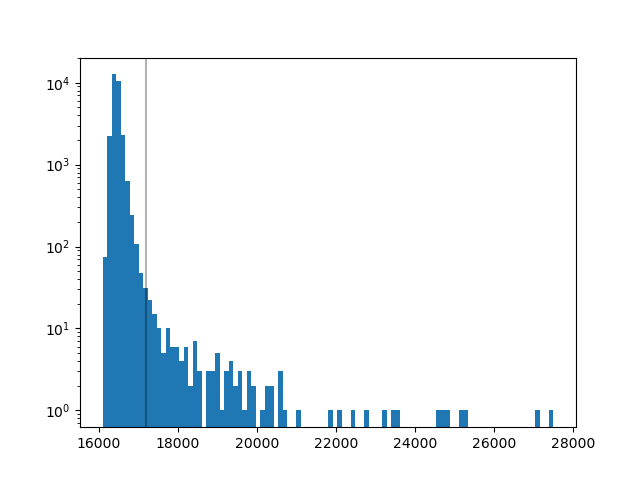

In [258]:
plt.figure()
image=Path+'Dark/Filter_{}_ExpoT_10s_dark.csv'.format(2)
suma=np.loadtxt(image)[140:310,170:340]
for filt in range(3,12):
    image=Path+'Dark/Filter_{}_ExpoT_10s_dark.csv'.format(filt)
    imagearray=np.loadtxt(image)[140:310,170:340]
    suma=suma+imagearray
meand,stdd=np.mean(suma),np.std(suma)
plt.hist(suma.flatten(),bins=100,log=True)
plt.axvline(x=meand+3*stdd,c='k',alpha=0.3)

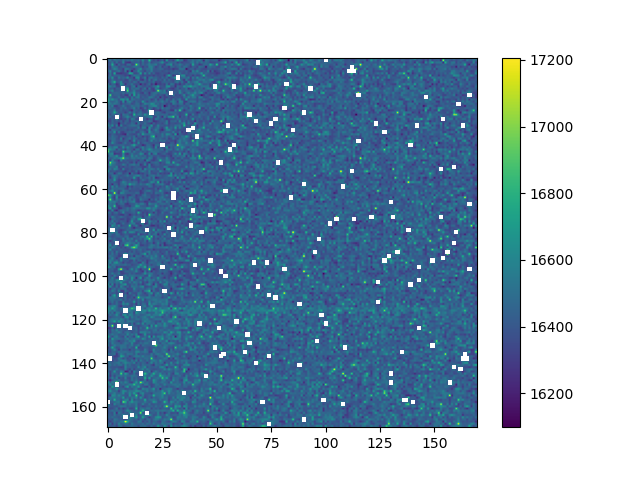

In [259]:
thresh=meand+3*stdd
mask=~(suma>thresh)
mask=mask*1.0
mask[mask == 0] = np.nan
suma1=suma*mask
plt.figure()
plt.imshow(suma1)
plt.colorbar()

# Fijar punto y cambiar filtros

In [260]:
point=5

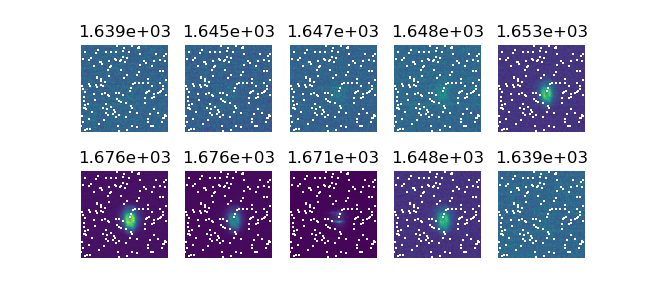

In [261]:
i=0
fig,axs=plt.subplots(2,5,figsize=(6.5,3))
for filt in range(2,12):
    image=Path+'Point{}/Filter_{}_rep_1_ExpoT_10s_Imag_1.csv'.format(point,filt)
    imagearray=np.loadtxt(image)[140:310,170:340]
    im=imagearray*mask
    axs[np.floor_divide(i,5),np.mod(i,5)].set_title('{:.3e}'.format(np.nanmean(im)))
    axs[np.floor_divide(i,5),np.mod(i,5)].imshow(im)
    axs[np.floor_divide(i,5),np.mod(i,5)].axis('off')
    i+=1
    #plt.tight_layout()

In [262]:
#plt.close('all')

### Histogramas de un punto

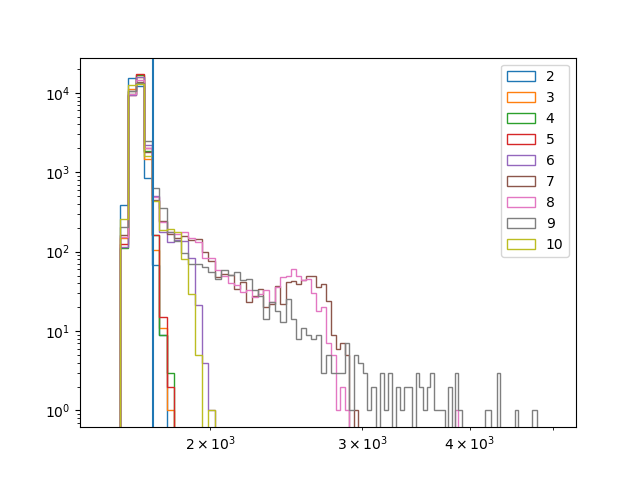

In [263]:
plt.figure()
for filt in range(2,11):
    image=Path+'Point{}/Filter_{}_rep_1_ExpoT_10s_Imag_1.csv'.format(point,filt)
    imagearray=np.loadtxt(image)[140:310,170:340]
    im=imagearray*mask
    a=im.flatten()
    plt.hist(a[~np.isnan(a)],bins=100,range=[1500, 5000],label=filt,histtype=u'step')
#plt.xscale('log')
plt.yscale('log')
plt.xscale('log')
plt.axvline(x=thresh2)
plt.legend()

### Con threshold de 2 sigma

Para seleccionar la zona en la que se centra la señal aplico un threshold a 2 sigmas (habria que ver que threshold es el optimo) y me quito todos lo pixels con intensidades inferiores

In [270]:
thresh2=thresh/10

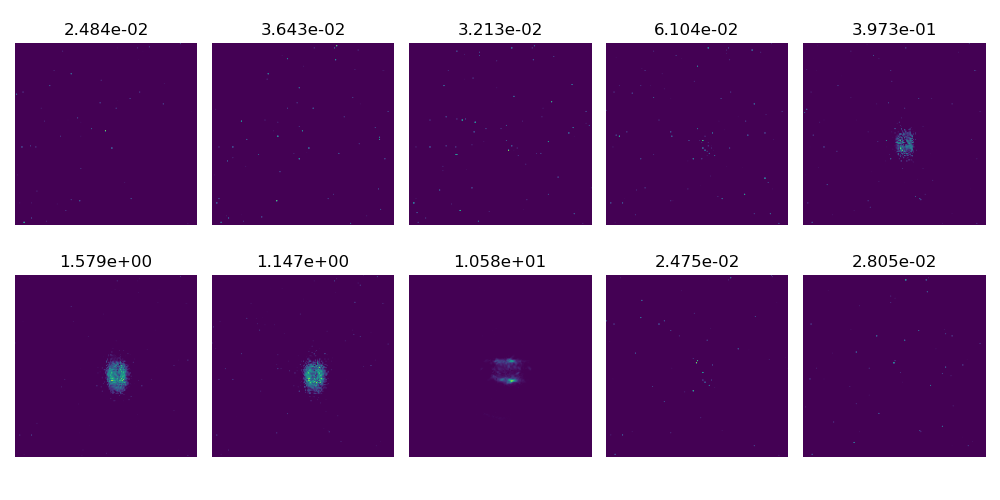

In [271]:
i=0
fig,axs=plt.subplots(2,5,figsize=(10,5))
for filt in range(2,12):
    image=Path+'Point{}/Filter_{}_rep_1_ExpoT_10s_Imag_1.csv'.format(point,filt)
    imagearray=np.loadtxt(image)[140:310,170:340]
    signal=(imagearray)*mask
    mask2=signal>thresh2
    mask2=mask2*1.0
    mask2[mask2==0]=np.nan
    im=signal*mask2
    im=im
    im[np.isnan(im)]=thresh2
    im-=thresh2
    axs[np.floor_divide(i,5),np.mod(i,5)].set_title('{:.3e}'.format(np.nanmean(im)))
    axs[np.floor_divide(i,5),np.mod(i,5)].imshow(im)
    axs[np.floor_divide(i,5),np.mod(i,5)].axis('off')
    i+=1
plt.tight_layout()

### Espectro
Falta tener en cuenta el ancho de los filtros

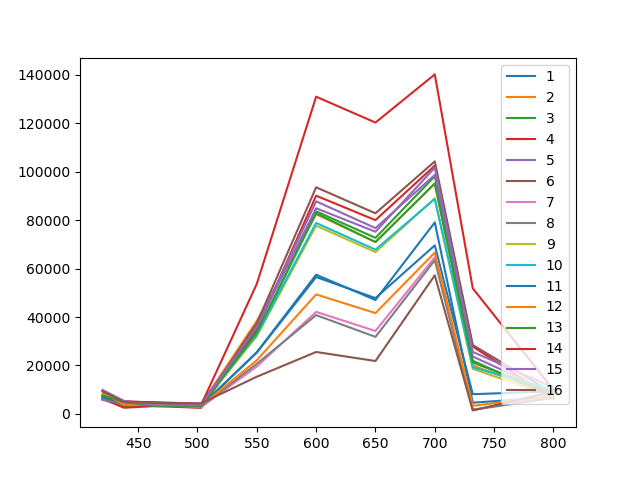

In [266]:
plt.figure()
for point in range (1,npoints+1):
    array=np.array([])
    for filt in range(2,12):
        image=Path+'Point{}/Filter_{}_rep_1_ExpoT_10s_Imag_1.csv'.format(point,filt)
        imagearray=np.loadtxt(image)[140:310,170:340]
        signal=(imagearray)*mask
        mask2=signal>thresh2
        mask2=mask2*1.0
        mask2[mask2==0]=np.nan
        im=signal*mask2
        im[np.isnan(im)]=0.0
        s=np.sum(im)
        array=np.append(array,s)
    x=[420,438,465,503,550,600,650,700,732,800]
    widths=[10.0, 24.0, 30.0, 40.0, 49.0, 52.0, 60.0, 40.0, 68.0, 10.0]
    plt.plot(x,array/widths,label=point)
plt.legend()